the dataset ner_dataset.csv from https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/giau/Desktop/ner_dataset.csv', encoding= 'unicode_escape')
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [3]:
data.shape

(1048575, 4)

In [4]:
from itertools import chain
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['Word'].to_list()))
    else:
        vocab = list(set(data['Tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok


token2idx, idx2token = get_dict_map(data, 'token')
tag2idx, idx2tag = get_dict_map(data, 'tag')

In [5]:
data['Word_idx'] = data['Word'].map(token2idx)
data['Tag_idx'] = data['Tag'].map(tag2idx) 

In [6]:
data.head()

,Sentence #,Word,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands,NNS,O,13032,13
1,NaN,of,IN,O,32099,13
2,NaN,demonstrators,NNS,O,34184,13
3,NaN,have,VBP,O,604,13
4,NaN,marched,VBN,O,6713,13


In [7]:
data.isna().any()

Sentence #     True
Word          False
POS           False
Tag           False
Word_idx      False
Tag_idx       False
dtype: bool

In [8]:
data_fillna = data.fillna(method='ffill', axis=0)
data_group = data_fillna.groupby(['Sentence #'],as_index=False
                                )['Word', 'POS', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

data_group.head()

C:\Users\giau\AppData\Local\Temp\ipykernel_7148\1778839611.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_group = data_fillna.groupby(['Sentence #'],as_index=False


,Sentence #,Word,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[13032, 32099, 34184, 604, 6713, 7488, 32834, ...","[13, 13, 13, 13, 13, 13, 4, 13, 13, 13, 13, 13..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[10349, 31637, 3204, 23767, 24150, 32118, 3088...","[3, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[11161, 25822, 32107, 4197, 19151, 33645, 2454...","[13, 13, 1, 13, 13, 13, 13, 13, 4, 13, 13, 13,..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]","[O, O, O, O, O, O, O, O, O, O, O]","[8326, 1834, 29879, 27538, 5945, 25987, 4327, ...","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...","[27770, 21956, 24620, 15927, 25129, 8051, 1937...","[4, 13, 13, 6, 0, 13, 1, 13, 4, 13, 3, 13, 3, ..."


In [9]:
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [10]:
def get_pad_train_test_val(data_group, data):
    n_token = len(list(set(data['Word'].to_list())))
    n_tag = len(list(set(data['Tag'].to_list())))
    
    tokens = data_group['Word_idx'].tolist()
    maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= n_token - 1)
    
    tags = data_group['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    
    n_tags = len(tag2idx)
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]
    
    
    train_tokens, test_tokens, train_tags, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.1, train_size=0.9, random_state=2020)

    print(
        'train_tokens length:', len(train_tokens),
        '\ntest_tokens length:', len(test_tokens),
        '\ntrain_tags:', len(train_tags),
        '\ntest_tags:', len(test_tags)
    )
    
    return train_tokens, test_tokens, train_tags, test_tags

train_tokens, test_tokens, train_tags, test_tags = get_pad_train_test_val(data_group, data)

train_tokens length: 43163 
test_tokens length: 4796 
train_tags: 43163 
test_tags: 4796


In [11]:
for token, tag in zip(train_tokens[0], train_tags[0]):
    print('%s\t%s' % (token, tag))

3842	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
3204	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
4620	[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11911	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
29779	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
29686	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
32118	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
20923	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
15766	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
32656	[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
25301	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
4921	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
23767	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
32615	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
28647	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
28504	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
3987	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
23

In [12]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model

# import keras as k

In [13]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [14]:
input_dim = len(list(set(data['Word'].to_list())))+1
output_dim = 32
input_length = max([len(s) for s in data_group['Word_idx'].tolist()])
n_tags = len(tag2idx)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  35179 
output_dim:  32 
input_length:  104 
n_tags:  17


In [15]:
def get_bilstm_lstm_model():
    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

    # Add bidirectional LSTM
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

    # Add LSTM
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

    # Add timeDistributed Layer
    model.add(TimeDistributed(Dense(n_tags, activation="relu")))

    #Optimiser 
    # adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 104, 32)           1125728   
                                                                 
 bidirectional (Bidirectiona  (None, 104, 64)          16640     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 104, 32)           12416     
                                                                 
 time_distributed (TimeDistr  (None, 104, 17)          561       
 ibuted)                                                         
                                                                 
Total params: 1,155,345
Trainable params: 1,155,345
Non-trainable params: 0
_________________________________________________________________


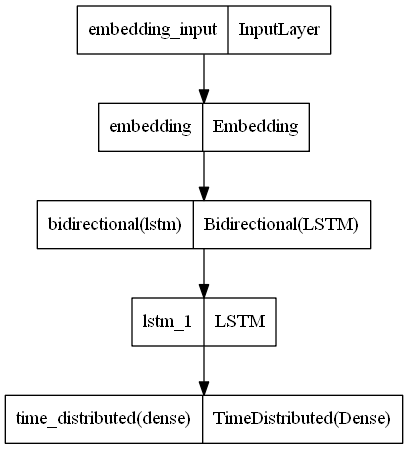

In [16]:
def train_model(X, y, model):
    loss = list()
    for _ in range(25):
        # fit model for one epoch on this sequence
        hist = model.fit(X, y, batch_size=1000, verbose=1, epochs=1, validation_split=0.2)
        loss.append(hist.history['loss'][0])
    return loss
model_bilstm_lstm = get_bilstm_lstm_model()
plot_model(model_bilstm_lstm)

In [17]:
results = pd.DataFrame()
results['with_add_lstm'] = train_model(train_tokens, np.array(train_tags), model_bilstm_lstm)

35/35 [==============================] - 291s 8s/step - loss: 0.1764 - accuracy: 0.9681 - val_loss: 0.1837 - val_accuracy: 0.9681


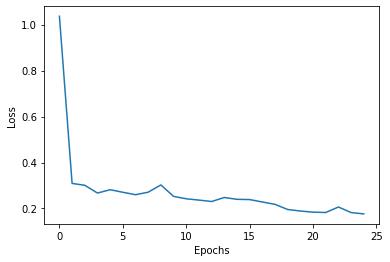

In [18]:
import matplotlib.pyplot as plt
plt.plot(results['with_add_lstm'])
plt.xlabel('Epochs');
plt.ylabel('Loss');

In [6]:
conda install -c conda-forge spacy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\giau\anaconda3

  added / updated specs:
    - spacy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    catalogue-2.0.8            |   py39hcbf5309_0          33 KB  conda-forge
    conda-22.9.0               |   py39hcbf5309_1         968 KB  conda-forge
    cymem-2.0.6                |   py39hd77b12b_0          34 KB
    cython-blis-0.7.8          |   py39h5d4886f_0         5.6 MB  conda-forge
    langcodes-3.3.0            |     pyhd8ed1ab_0         156 KB  conda-forge
    murmurhash-1.0.7           |   py39hd77b12b_0          24 KB
    pathy-0.6.2                |     pyhd8ed1ab_0          38 KB  conda-forge
    preshed-3.0.6              |   py39h6c2663c_0          76 KB
    pydantic-1.9.2             |   py39hb82d6ee_0         1.6 MB  conda-forge
    python_abi-3.9             |           2

In [8]:
conda update spacy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\giau\anaconda3

  added / updated specs:
    - spacy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    catalogue-2.0.7            |   py39haa95532_0          35 KB
    conda-package-handling-1.9.0|   py39h8cc25b3_0         726 KB
    cython-blis-0.7.7          |   py39h080aedc_0         1.9 MB
    langcodes-3.3.0            |     pyhd3eb1b0_0         151 KB
    pathy-0.6.1                |   py39haa95532_0          91 KB
    pydantic-1.9.0             |   py39h2bbff1b_1         1.3 MB
    pyjwt-2.4.0                |   py39haa95532_0          38 KB
    shellingham-1.3.1          |     pyhd3eb1b0_0          12 KB
    spacy-legacy-3.0.9         |   py39haa95532_0          33 KB
    spacy-loggers-1.0.1        |     pyhd3eb1b0_0          10 KB
    srsly-2.4.3                |   py39hd77b12b_0       

In [14]:
pip install wasabi==0.9.1

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install -U spacy

  Using cached spacy-3.4.1-cp39-cp39-win_amd64.whl (11.8 MB)

  Using cached thinc-8.1.5-cp39-cp39-win_amd64.whl (1.3 MB)
  Attempting uninstall: blis
    Found existing installation: blis 0.7.7
    Uninstalling blis-0.7.7:
      Successfully uninstalled blis-0.7.7
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.15
    Uninstalling thinc-8.0.15:
      Successfully uninstalled thinc-8.0.15
  Attempting uninstall: spacy
    Found existing installation: spacy 3.3.1
    Uninstalling spacy-3.3.1:
      Successfully uninstalled spacy-3.3.1


In [16]:
!python -m spacy download en

2022-10-20 07:58:33.603431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-20 07:58:33.603548: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-20 07:58:40.365196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-20 07:58:40.365489: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-20 07:58:40.379146: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-INHNM4H
2022-10-20 07:58:40.379393: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-INHNM4H


[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

C:\Users\giau\anaconda3\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.4.0) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [26]:
text = nlp(
    'The latest uprising in Iran is the result of decades of pent-up fury at Iran regime. Women are tired of being forced to cover their hair. It became obligatory in April 1983 for them to do so. Punishments for violating this law range from financial penalties to imprisonment.')

In [27]:
for w in text.ents:
    print(w.text, w.label_)

Iran GPE
decades DATE
Iran GPE
April 1983 DATE


In [28]:
displacy.render(text, style = 'ent', jupyter=True)

In [25]:
spacy.explain('CARDINAL')

'Numerals that do not fall under another type'